# Importar librerias 

In [1]:
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from math import ceil
import json as js
import ast as ast
import re

# Lectura de data

In [2]:
df_games = pd.read_json('./data_clean/cleaned_output_steam_games.json', lines=True)
df_reviews = pd.read_json('./data_clean/cleaned_user_reviews.json', lines=True)
df_items = pd.read_json('./data_clean/cleaned_australian_users_items.json', lines=True)

In [3]:
df_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,NaN,None,None,None,NaN,0,NaN,None
1,None,None,None,None,None,NaN,None,None,None,NaN,0,NaN,None
2,None,None,None,None,None,NaN,None,None,None,NaN,0,NaN,None
3,None,None,None,None,None,NaN,None,None,None,NaN,0,NaN,None
4,None,None,None,None,None,NaN,None,None,None,NaN,0,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,1.515024e+12,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0,773640.0,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,1.515024e+12,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0,733530.0,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,1.515024e+12,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0,610660.0,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,1.504310e+12,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0,658870.0,"xropi,stev3ns"


__como tenemos algunas listas dentro de las columnas no podremos borrarlas con un drop.duplicated asi que verificaremos cuales de ellas nos saltaremos__

In [4]:

for col in df_games.columns:
    if df_games[col].apply(type).eq(list).any():
        print(f"La columna '{col}' contiene listas.")

La columna 'genres' contiene listas.
La columna 'tags' contiene listas.
La columna 'specs' contiene listas.


 __Para la data de reviews decidi elimianar los nulos y los duplicados dentro del ETL debido a que ahi mismo trabaje para crear el analisis de sentimiento NLP y si trabajaba primero el analisis y despues eliminaba los duplicados me borra toda la data de esta misma__

In [5]:
df_reviews

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,sentiment_analysis
0,Wackky,http://steamcommunity.com/id/Wackky,0,NaN,"Last edited November 25, 2013.",550,1 of 1 people (100%) found this review helpful,1,2
1,kevinator23,http://steamcommunity.com/id/kevinator23,0,NaN,Last edited March 8.,218620,2 of 5 people (40%) found this review helpful,1,2
2,Lord_Exploit,http://steamcommunity.com/id/Lord_Exploit,0,NaN,"Last edited March 19, 2015.",311560,6 of 10 people (60%) found this review helpful,1,2
3,76561198141443390,http://steamcommunity.com/profiles/76561198141...,0,NaN,"Last edited November 8, 2015.",730,3 of 4 people (75%) found this review helpful,1,2
4,2768820078,http://steamcommunity.com/id/2768820078,0,NaN,Last edited April 23.,310950,2 of 3 people (67%) found this review helpful,1,1
...,...,...,...,...,...,...,...,...,...
1133,thisisatrash,http://steamcommunity.com/id/thisisatrash,0,NaN,"Last edited October 12, 2015.",391540,34 of 53 people (64%) found this review helpful,1,2
1134,valinorau,http://steamcommunity.com/id/valinorau,0,NaN,"Last edited November 7, 2015.",311210,7 of 14 people (50%) found this review helpful,1,2
1135,imakeclocks,http://steamcommunity.com/id/imakeclocks,0,NaN,"Last edited April 5, 2015.",730,4 of 5 people (80%) found this review helpful,1,2
1136,76561198208704549,http://steamcommunity.com/profiles/76561198208...,0,NaN,"Last edited September 8, 2015.",730,1 of 2 people (50%) found this review helpful,1,0


In [6]:
df_items

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,10.0,Counter-Strike,6.0,0.0
1,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,20.0,Team Fortress Classic,0.0,0.0
2,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,30.0,Day of Defeat,7.0,0.0
3,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,40.0,Deathmatch Classic,0.0,0.0
4,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,50.0,Half-Life: Opposing Force,0.0,0.0
...,...,...,...,...,...,...,...,...
5170010,76561198329548331,7,76561198329548336,http://steamcommunity.com/profiles/76561198329...,373330.0,All Is Dust,0.0,0.0
5170011,76561198329548331,7,76561198329548336,http://steamcommunity.com/profiles/76561198329...,388490.0,One Way To Die: Steam Edition,3.0,3.0
5170012,76561198329548331,7,76561198329548336,http://steamcommunity.com/profiles/76561198329...,521570.0,You Have 10 Seconds 2,4.0,4.0
5170013,76561198329548331,7,76561198329548336,http://steamcommunity.com/profiles/76561198329...,519140.0,Minds Eyes,3.0,3.0


Despues de revisar brevemente las datas notamos que tienen valores nulos y dplicados por los que procederemos a elimianrlos

__Borramos duplicados y nulos__

In [7]:
# GAMES 

df_games = df_games.dropna(how='all') #borra filas donde las celdas sean nulas 

df_games = df_games.drop_duplicates(subset=[
    'publisher','app_name','title','url','release_date','reviews_url','price','early_access','id','developer'
    ]) # borramos duplicados 

df_games.drop(index=0, inplace=True)

# ITEMS
df_items = df_items.drop_duplicates() # borramos duplicados
df_items = df_items.dropna() # eliminamos nulo


In [8]:
df_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,1.515024e+12,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0,761140.0,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,1.515024e+12,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,0,643980.0,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,1.500854e+12,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,0,670290.0,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,1.512605e+12,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0,767400.0,彼岸领域
88314,None,None,Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0,773570.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,1.515024e+12,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0,773640.0,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,1.515024e+12,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0,733530.0,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,1.515024e+12,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0,610660.0,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,1.504310e+12,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0,658870.0,"xropi,stev3ns"


In [9]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             1138 non-null   object 
 1   user_url            1138 non-null   object 
 2   funny               1138 non-null   int64  
 3   posted              0 non-null      float64
 4   last_edited         1138 non-null   object 
 5   item_id             1138 non-null   int64  
 6   helpful             1138 non-null   object 
 7   recommend           1138 non-null   int64  
 8   sentiment_analysis  1138 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 80.1+ KB


In [10]:
df_items

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,10.0,Counter-Strike,6.0,0.0
1,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,20.0,Team Fortress Classic,0.0,0.0
2,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,30.0,Day of Defeat,7.0,0.0
3,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,40.0,Deathmatch Classic,0.0,0.0
4,76561197970982479,277,76561197970982480,http://steamcommunity.com/profiles/76561197970...,50.0,Half-Life: Opposing Force,0.0,0.0
...,...,...,...,...,...,...,...,...
5170009,76561198329548331,7,76561198329548336,http://steamcommunity.com/profiles/76561198329...,346330.0,BrainBread 2,0.0,0.0
5170010,76561198329548331,7,76561198329548336,http://steamcommunity.com/profiles/76561198329...,373330.0,All Is Dust,0.0,0.0
5170011,76561198329548331,7,76561198329548336,http://steamcommunity.com/profiles/76561198329...,388490.0,One Way To Die: Steam Edition,3.0,3.0
5170012,76561198329548331,7,76561198329548336,http://steamcommunity.com/profiles/76561198329...,521570.0,You Have 10 Seconds 2,4.0,4.0


# EDA 

Realizaremos un histograma de precios para detectar tendencias generales, como si la mayoría de los juegos son económicos o si hay un número significativo de juegos premium. <br>
 Esto puede ser útil para entender el mercado

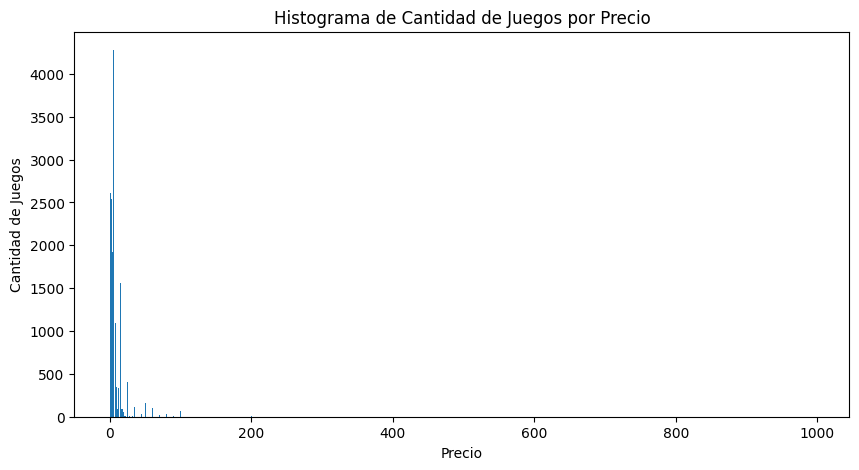

In [11]:
count_prices = df_games['price'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(count_prices.index, count_prices.values)
plt.title('Histograma de Cantidad de Juegos por Precio')
plt.xlabel('Precio')
plt.ylabel('Cantidad de Juegos')
plt.show()

In [12]:
print("Estadísticas descriptivas de precios:")
print(df_games['price'].describe())

Estadísticas descriptivas de precios:
count    30758.000000
mean         8.866855
std         15.903457
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64


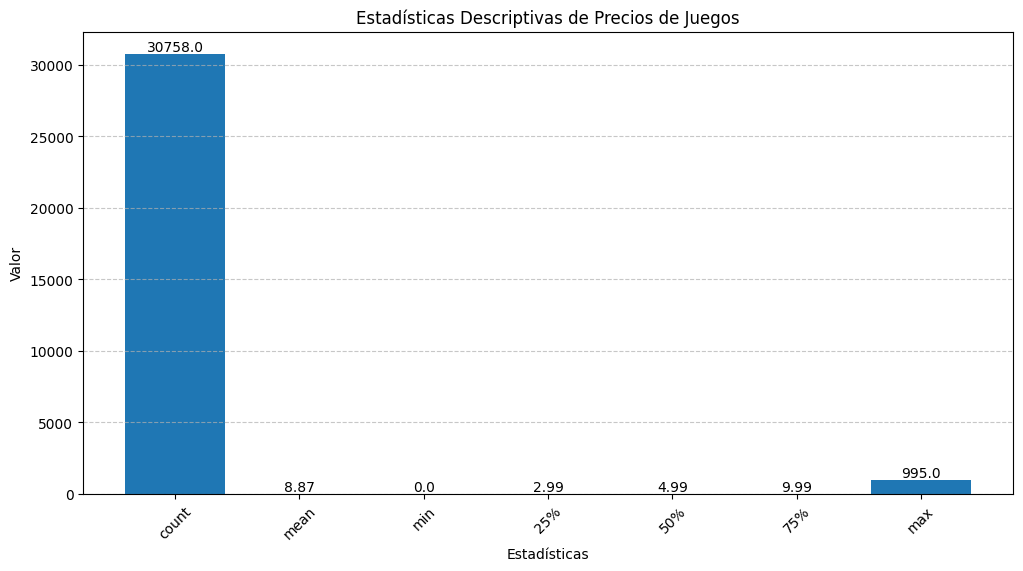

In [13]:
# Calcular estadísticas descriptivas
stats = df_games['price'].describe()
stats_filtered = stats[['count', 'mean', 'min', '25%', '50%', '75%', 'max']]

plt.figure(figsize=(12, 6))
bars = plt.bar(stats_filtered.index, stats_filtered.values)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Estadísticas Descriptivas de Precios de Juegos')
plt.ylabel('Valor')
plt.xlabel('Estadísticas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Realizaremos un top 10 con el genero mas jugado de la platafroma ya que este permite segmentar el mercado en función de las preferencias de los jugadores. Esto es útil para dirigir campañas publicitarias a audiencias específicas que se inclinan hacia ciertos tipos de juegos.

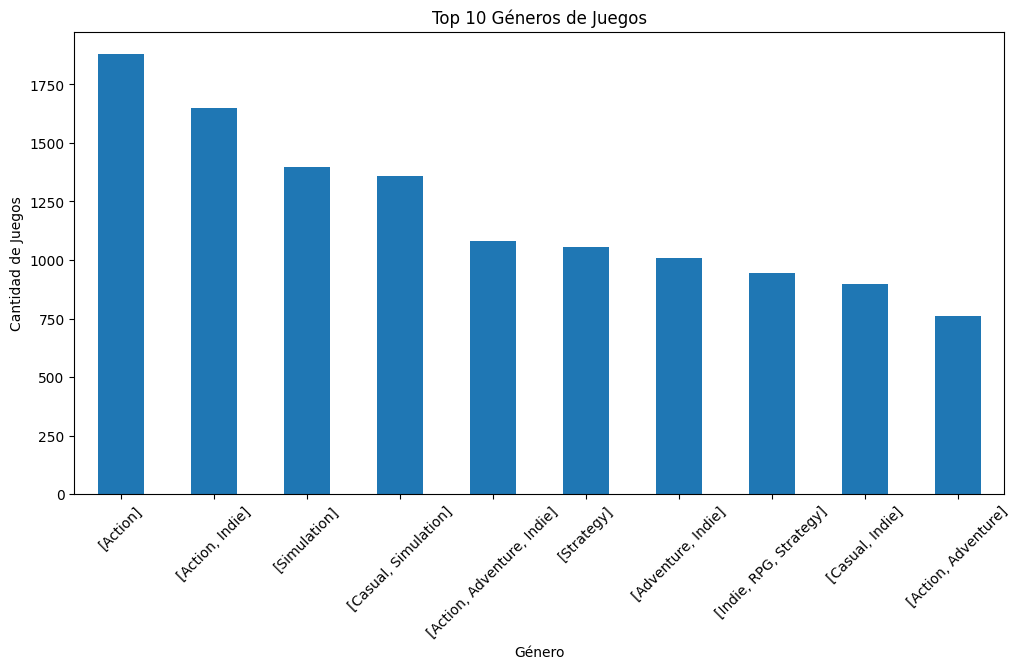

In [14]:
top_genres = df_games['genres'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar')
plt.title('Top 10 Géneros de Juegos')
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)  
plt.show()

Realizaremos un top 3 con los juegos mas jugados dentro de la platafoma.
ya que con este top 3 sabremos cuales son los juegos favoritos dentro de steam 

In [15]:

top_games = df_items.groupby('item_id')['playtime_forever'].sum().reset_index()
top_games = top_games.merge(df_games[['id', 'title']], left_on='item_id', right_on='id', how='left')
top_games = top_games.sort_values(by='playtime_forever', ascending=False).head(3)

print("Top 3 Juegos Más Jugados:")
print(top_games[['title', 'playtime_forever']])


Top 3 Juegos Más Jugados:
                                 title  playtime_forever
23    Counter-Strike: Global Offensive       775918724.0
163                        Garry's Mod       441871026.0
1673                          Terraria       152997644.0


pasamos a observar cuantos de los usuarios pideron un acceso anticipado para la compra de sus videojuegos.

early_access
0    30188
1     1947
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

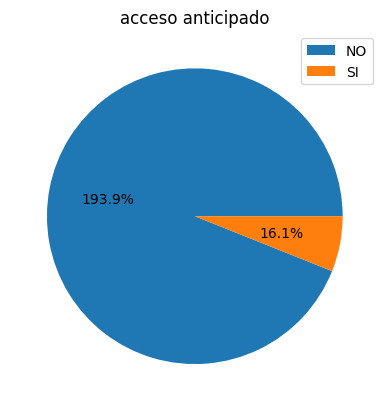

In [16]:
print(df_games['early_access'].value_counts())

plt.pie(df_games['early_access'].value_counts(),autopct='1%.1f%%')
plt.title('acceso anticipado')
plt.legend(['NO','SI'])
plt.show

buscamos el top 5 de desarolladores en base a los numeros de juegos publicados 

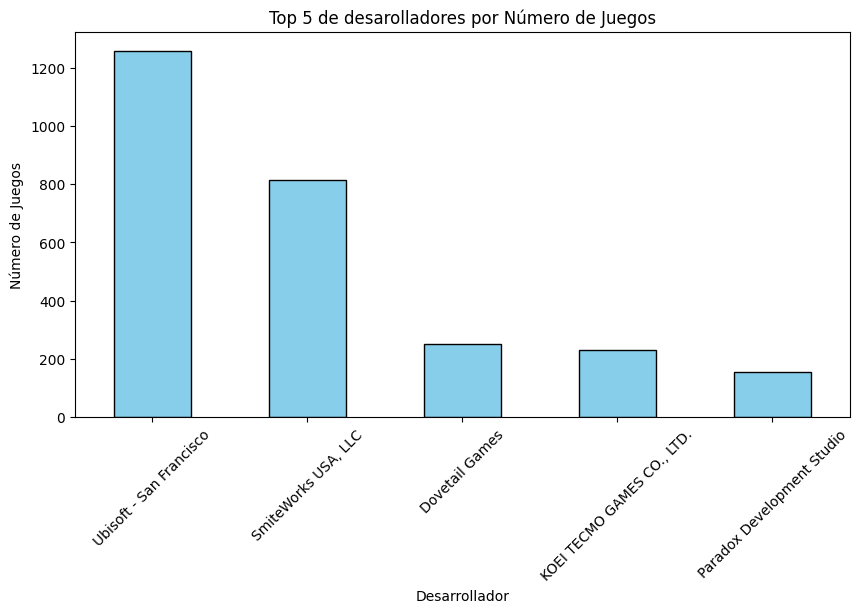

In [17]:
top_dev = df_games['developer'].value_counts().head(5)

plt.figure(figsize=(10, 5))
top_dev.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 de desarolladores por Número de Juegos')
plt.xlabel('Desarrollador')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45)
plt.show()

junto a al top 5 basado en el precio promedio de sus juegos 

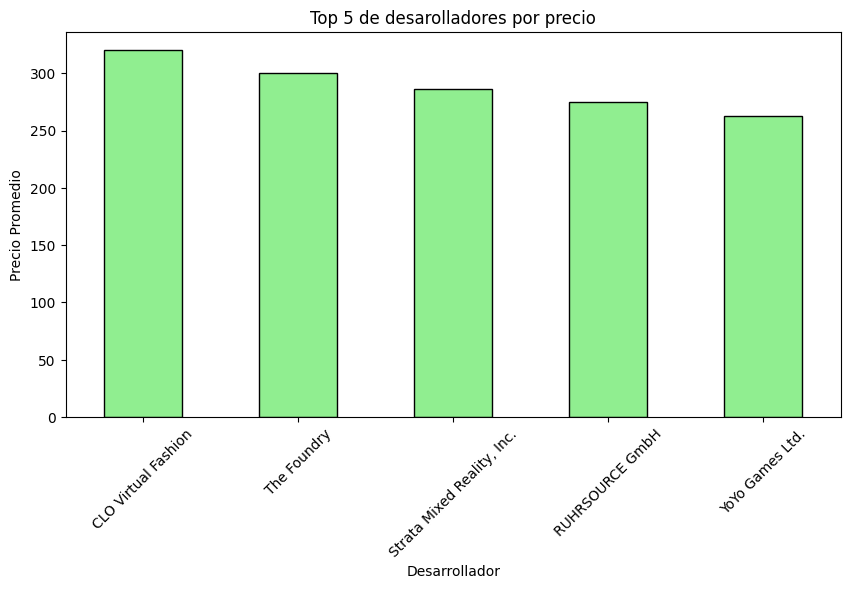

In [18]:
prom_dev = df_games.groupby('developer')['price'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
prom_dev.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 5 de desarolladores por precio')
plt.xlabel('Desarrollador')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.show()


# REVIEWS

realizaremos el histograma de la cantidad de reviews por cada usuario 

In [19]:
df_reviews['user_id'].value_counts()

user_id
Norf_Norf            7
loadsamoney          6
Revan_Aldrei         6
jet14                5
37755753             5
                    ..
Variun               1
SULL3H               1
76561198033982370    1
76561198080103160    1
MeloncraftLP         1
Name: count, Length: 943, dtype: int64

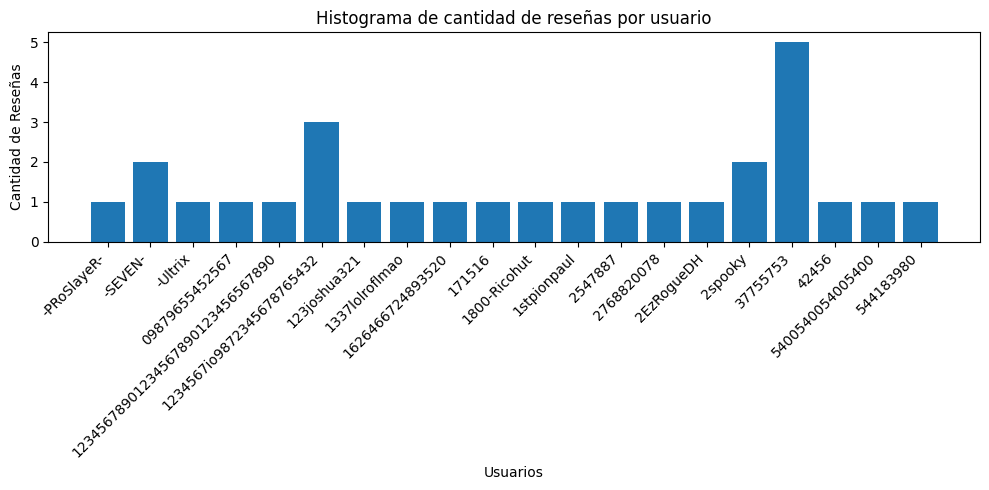

In [20]:
count_r = df_reviews['user_id'].value_counts().sort_index().head(20)

plt.figure(figsize=(10, 5))
plt.bar(count_r.index, count_r.values)
plt.title('Histograma de cantidad de reseñas por usuario')
plt.xlabel('Usuarios')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  # Ajusta el layout para evitar superposiciones
plt.show()


Teniendo esto en cuenta realizaremos un conteo con las recomendaciones en base al NLP

In [21]:
recommend = df_reviews['recommend'].value_counts()
print("Conteo de recomendaciones:")
print(recommend)

Conteo de recomendaciones:
recommend
1    907
0    231
Name: count, dtype: int64


con el analisis de sentimiento y el conteo realizaremos una tabla la cual nos dara la frecuencia de recomendacion de los usuarios 


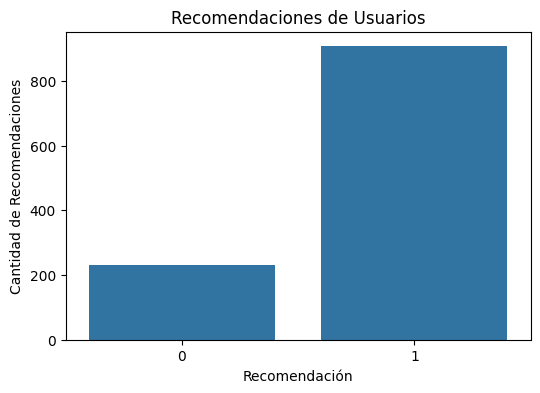

In [22]:
# Contar recomendaciones positivas y negativas
recommend = df_reviews['recommend'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=recommend.index, y=recommend.values)
plt.title('Recomendaciones de Usuarios')
plt.xlabel('Recomendación')
plt.ylabel('Cantidad de Recomendaciones')
plt.show()


<Figure size 1000x500 with 0 Axes>

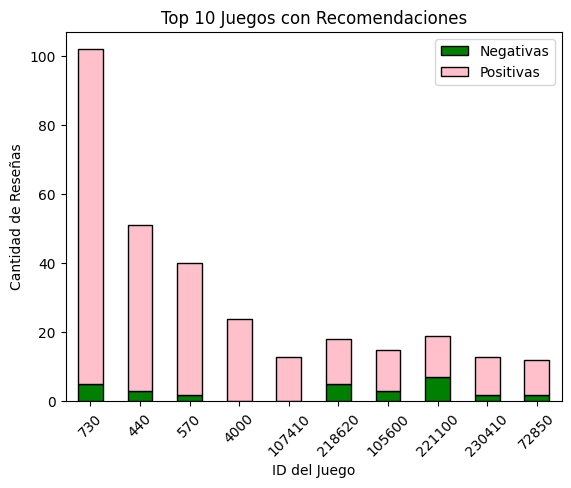

In [23]:
count = df_reviews.groupby('item_id')['recommend'].value_counts().unstack(fill_value=0)

count.columns = ['Negativas', 'Positivas']
top_count = count.sort_values(by='Positivas', ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_count.plot(kind='bar', stacked=True, color=['green', 'pink'], edgecolor='black')
plt.title('Top 10 Juegos con Recomendaciones')
plt.xlabel('ID del Juego')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(rotation=45)  
plt.show()



# ITEMS

realizaremos un conteo de usuarios con mas cantidad de items 

In [24]:
df_items['user_id'].value_counts().sort_values()

user_id
76561198065652533       1
76561198073488825       1
76561198058316026       1
76561198085602538       1
76561198038516576       1
                     ... 
mayshowganmore       5027
piepai               6132
chidvd               6410
thugnificent         6700
phrostb              7762
Name: count, Length: 70912, dtype: int64

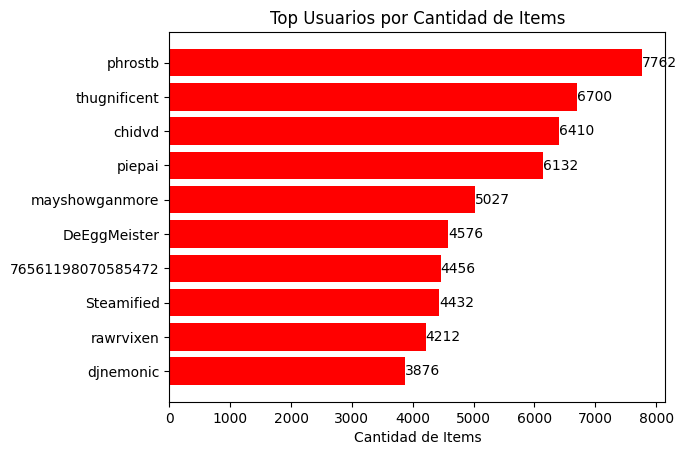

In [25]:
top_users = df_items['user_id'].value_counts().head(10)
plt.barh(top_users.index, top_users.values, color='red')
plt.gca().invert_yaxis()
plt.title('Top Usuarios por Cantidad de Items')
plt.xlabel('Cantidad de Items')

for index, value in enumerate(top_users.values):
    plt.text(value, index, str(value), va='center')
plt.show()


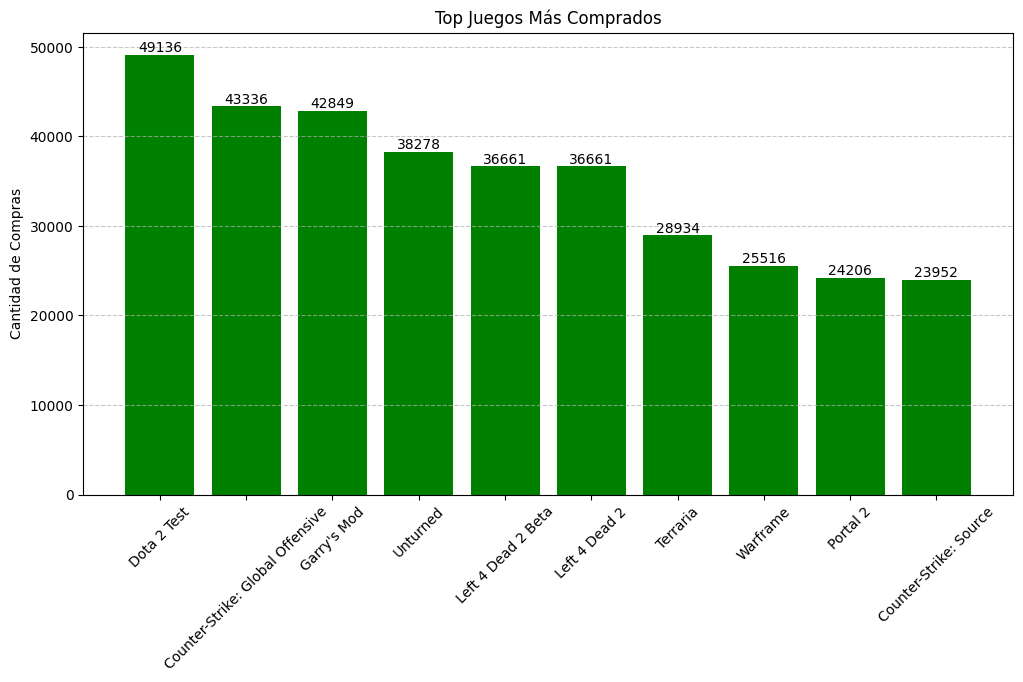

In [26]:
# Contar las veces que cada juego (item_name) ha sido comprado
top_games = df_items['item_name'].value_counts().head(10)  

plt.figure(figsize=(12, 6))
plt.bar(top_games.index, top_games.values, color='green')
plt.title('Top Juegos Más Comprados')
plt.ylabel('Cantidad de Compras')

for index, value in enumerate(top_games.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [27]:
print("Estadísticas descriptivas de playtime_forever:")
print(df_items['playtime_forever'].describe())

Estadísticas descriptivas de playtime_forever:
count    5.094105e+06
mean     9.905511e+02
std      5.414297e+03
min      0.000000e+00
25%      0.000000e+00
50%      3.400000e+01
75%      3.550000e+02
max      6.427730e+05
Name: playtime_forever, dtype: float64


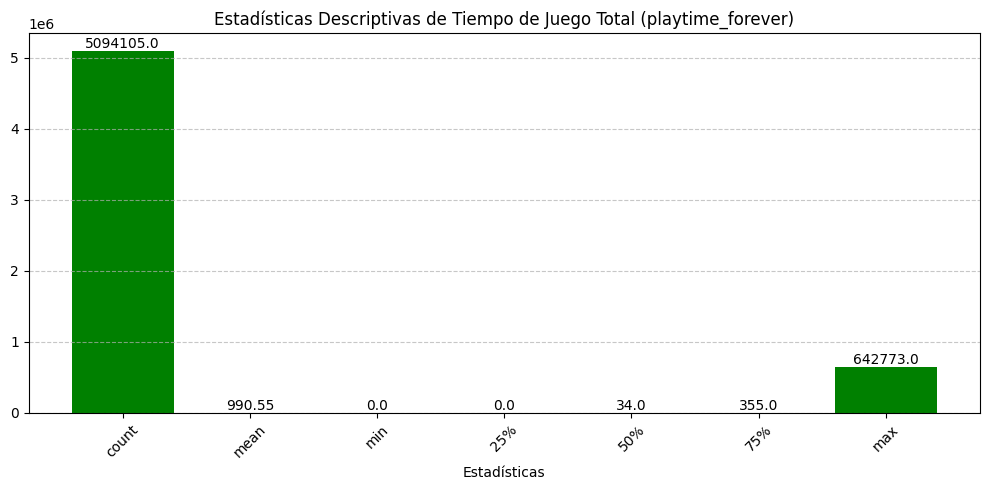

In [28]:
# Calcular estadísticas descriptivas para la columna playtime_forever
stats = df_items['playtime_forever'].describe()
stats_filtered = stats[['count', 'mean', 'min', '25%', '50%', '75%', 'max']]

plt.figure(figsize=(10, 5))
bars = plt.bar(stats_filtered.index, stats_filtered.values, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Estadísticas Descriptivas de Tiempo de Juego Total (playtime_forever)')
plt.xlabel('Estadísticas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()


In [46]:
# Se calcula el tiempo mínimo, máximo, mediana y promedio de juego en horas 
playtime_min = df_items['playtime_hours'].min()
playtime_max = df_items['playtime_hours'].max()
playtime_mediana = df_items['playtime_hours'].median()
playtime_promedio = df_items['playtime_hours'].mean()

print(f"Tiempo mínimo de juego: {playtime_min}")
print(f"Tiempo máximo de juego: {playtime_max}")
print(f"Mediana del tiempo de juego: {playtime_mediana}")
print(f"Promedio del tiempo de juego: {playtime_promedio}")

Tiempo mínimo de juego: 0.0
Tiempo máximo de juego: 10712.883333333333
Mediana del tiempo de juego: 0.5666666666666667
Promedio del tiempo de juego: 16.50918491733746


: 

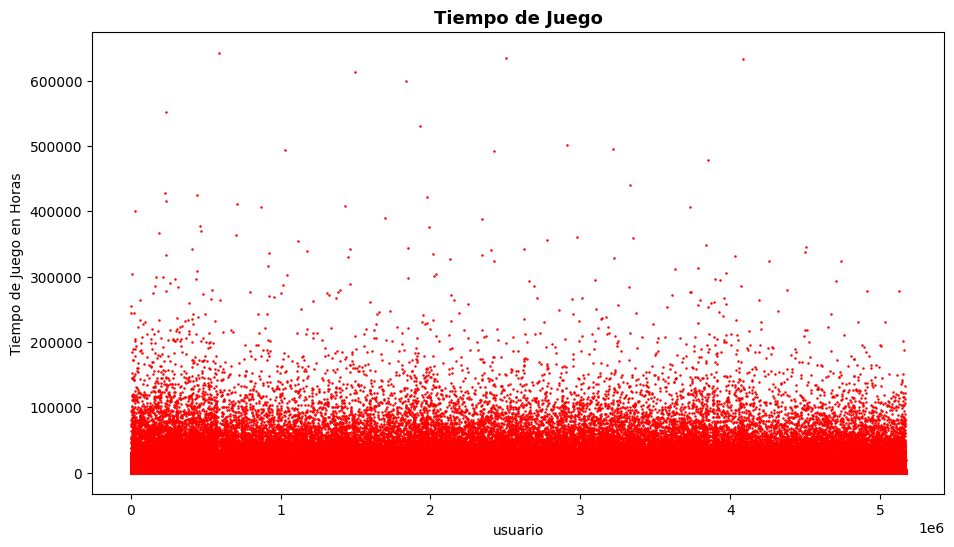

In [36]:
plt.figure(figsize=(11, 6))

plt.plot(df_items["playtime_forever"], linestyle='None', marker='o', markersize=0.8, color='red')
plt.title('Tiempo de Juego', fontweight='bold', fontsize=13)
plt.xlabel('usuario')
plt.ylabel('Tiempo de Juego en Horas')
plt.show()

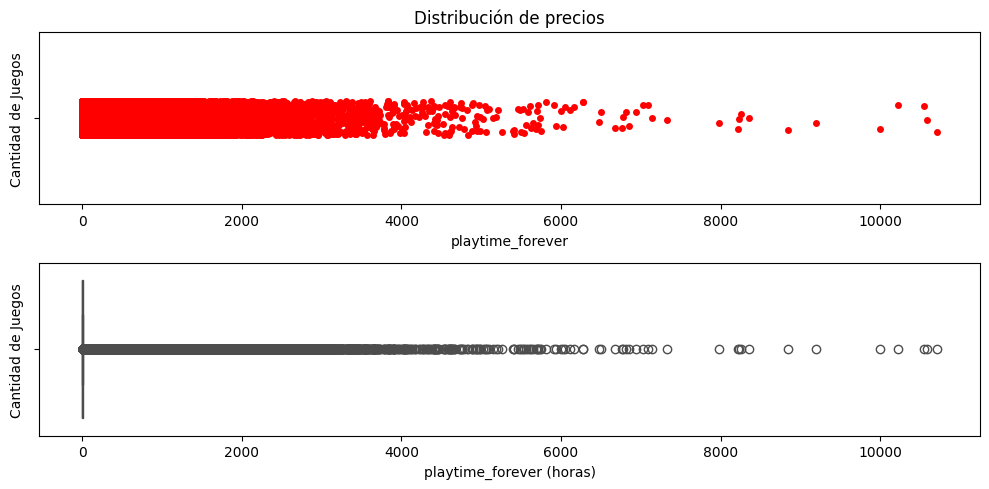

In [45]:
df_items['playtime_hours'] = df_items['playtime_forever'] / 60
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(211)
sns.stripplot(data=df_items, x='playtime_hours', ax=ax1, color='red')
ax1.set_xlabel('playtime_forever') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Distribución de precios')
ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_items, x='playtime_hours', ax=ax2, color='blue')
ax2.set_xlabel('playtime_forever (horas)') ; ax2.set_ylabel('Cantidad de Juegos')
plt.tight_layout()
plt.show()

In [33]:
#calculamos los outpints
tiempos_cero = df_items[df_items['playtime_forever'] == 0].shape[0]
porcentaje_cero = (tiempos_cero / df_items.shape[0]) * 100

print('Cantidad de tiempos en 0:', tiempos_cero)
print('Porcentaje de tiempos en 0:', round(porcentaje_cero, 2), '%')


Cantidad de tiempos en 0: 1847730
Porcentaje de tiempos en 0: 36.27 %


Al final de tu EDA, asegúrate de resumir tus hallazgos. Comenta sobre:

Outliers: ¿Qué juegos tienen precios extremadamente altos o bajos? <br>
Relaciones: ¿Hay una relación clara entre el precio y las horas jugadas? <br>
Géneros: ¿Qué géneros son los más caros y cuáles son los más jugados? <br>
Palabras Comunes: ¿Qué palabras aparecen con más frecuencia en los títulos? ¿Qué podrían sugerir sobre los juegos?

guadamos games y items en un archivo json para futuras utilizaciones

* df_games.to_json('./data_clean_EDA/cleaned_output_steam_games.json', orient='records', lines=True)
* df_reviews.to_json('./data_clean_EDA/cleaned_user_reviews.json', orient='records', lines=True)
* df_items.to_json('./data_clean_EDA/cleaned_australian_users_items.json', orient='records', lines=True)

Para finalizar vamos a guardar los archivos trabajaos en un .parquet para su utilizacion en el modelo de recomendacion.

* df_games.to_parquet('./data_clean_EDA/steam_games.parquet', index=False)
* df_reviews.to_parquet('./data_clean_EDA/user_reviews.parquet', index=False)
* df_items.to_parquet('./data_clean_EDA/australian_users_items.parquet', index=False)